## Exploring Netflix Content through Visual Analytics
### By Sepideh Forouzi  
---

# Introduction

The Netflix platform offers a wide array of entertainment content that spans multiple genres, durations, and countries of origin. With the increasing prominence of streaming services, understanding the patterns in such a content library can offer useful insights into consumer preferences and content production strategies.

This project focuses on a comprehensive visual analysis of Netflix’s catalog using a publicly available dataset. The analysis was driven by the need to answer fundamental questions:

- What is the distribution between Movies and TV Shows?  
- Which genres and countries dominate Netflix’s offerings?  
- How has content production evolved over the years?  
- What are the common duration patterns for different content types?  
- How is the content rated?

To explore these questions, a collection of well-structured visualizations was designed and implemented. These visualizations aim to inform both users and content strategists about the makeup of Netflix's library. Throughout the process, the focus was on clarity, interpretability, and visual coherence.

---

#  Data and Goals Recap

## Dataset Overview

The dataset used in this analysis is titled `netflix_titles.csv`, obtained from Kaggle’s Netflix Movies and TV Shows dataset. It contains information on thousands of titles available on Netflix as of 2021, with the following key attributes:

- Type: Indicates whether the entry is a Movie or a TV Show  
- Title: Name of the content  
- Director and Cast: Key production members and actors  
- Country: Country of origin  
- Date Added and Release Year: Temporal indicators  
- Rating: Age-appropriateness rating (e.g., TV-MA, PG)  
- Duration: Runtime (for Movies) or number of seasons (for TV Shows)  
- Genres (`listed_in`): Labels desc



---

## Project Goals

The objective was to visually summarize Netflix's catalog across several key dimensions:

1. Content Type Distribution – Proportion of Movies vs. TV Shows  
2. Genre Popularity – Most represented genres  
3. Country of Origin – Most prolific production countries  
4. Temporal Patterns – Trends in content release over time  
5. Duration Analysis – Runtime distribution for Movies and TV Shows  
6. Rating Distribution – How content is rated by age appropriateness  
7. Visual Design – Emphasize clear, insightful, and aesthetic graphics using Python libraries such as Altair, Matplotlib, and Seaborn


In [2]:
import sys, subprocess, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import altair_viewer
import plotly.express as px

def install_if_missing(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

for pkg in ["pandas", "altair", "altair_viewer", "matplotlib", "seaborn", "plotly"]:
    install_if_missing(pkg)

file_path = r"C:\Users\14163\Desktop\university cu boulder\Fundamentals of Data Visualization\Data\netflix_titles.csv"
out_dir = r"C:\Users\14163\Desktop\university cu boulder\Fundamentals of Data Visualization\Data"
os.makedirs(out_dir, exist_ok=True)

df = pd.read_csv(file_path)

print(f" Dataset Loaded: {df.shape[0]} rows × {df.shape[1]} columns")
display(df.head())

required_cols = ['date_added', 'country', 'rating']
missing = [col for col in required_cols if col not in df.columns]
if missing:
    print(f" Warning: Missing columns: {missing}")
else:
    print(" All required columns are present.")


 Dataset Loaded: 8807 rows × 12 columns


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


 All required columns are present.








# Visualizations and Design Justification

The following visualizations were implemented to address the defined goals. Each chart was selected based on the nature of the data (categorical, quantitative, or temporal) and its potential to answer specific questions clearly and efficiently.

## Top 10 Netflix Genres

The bar chart below presents the ten most frequent genres of content available on Netflix. A horizontal bar orientation was chosen to accommodate longer genre names and improve overall readability. 

The color palette was selected to maintain distinct visual separation between genres while avoiding overstimulation. This design choice facilitates comparative analysis, enabling viewers to quickly identify the dominance of specific content types such as *International Movies*, *Dramas*, and *Comedies*.


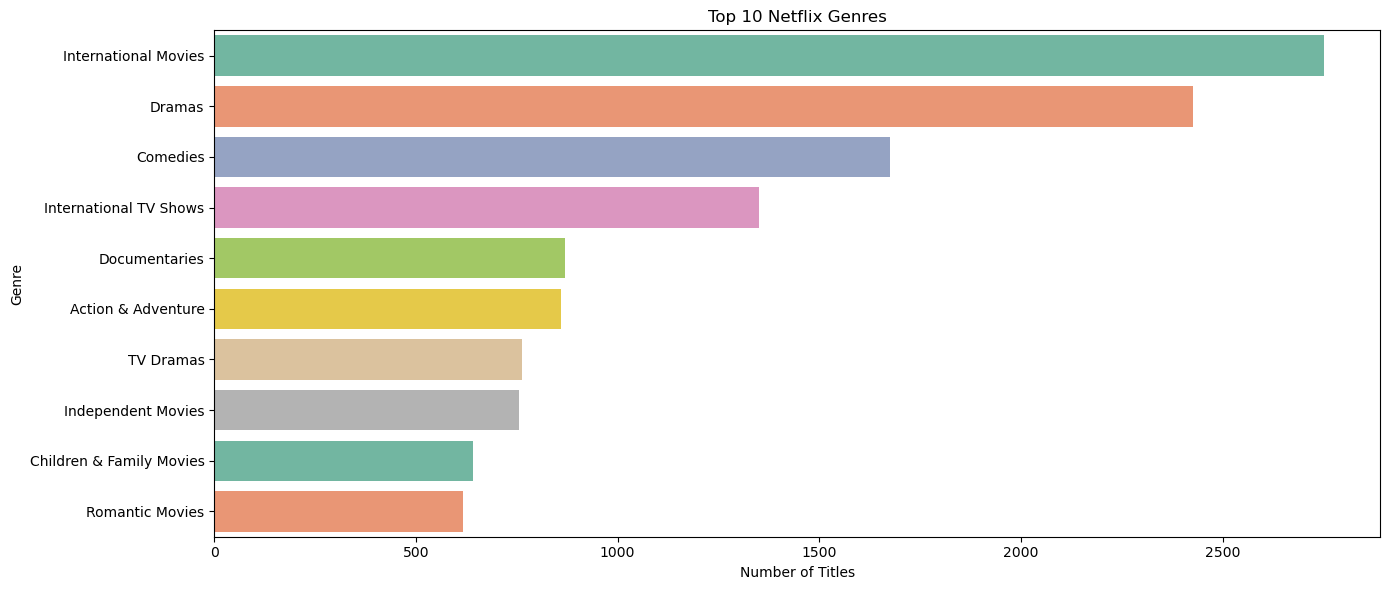

In [3]:
genres = df['listed_in'].dropna().str.split(', ')
genres_exploded = genres.explode()
top_genres = genres_exploded.value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="Set2")
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'Figure_1_Genres.png'))
plt.show()









## Top 10 Producing Countries

The bar chart below displays the top 10 countries responsible for producing content available on Netflix. A horizontal orientation was selected to improve the readability of longer country names and ensure consistent alignment.

The color palette was deliberately kept soft and balanced to avoid visual bias toward any particular country. This design facilitates straightforward cross-country comparisons, effectively revealing the overwhelming content dominance of the United States, followed by India and the United Kingdom.


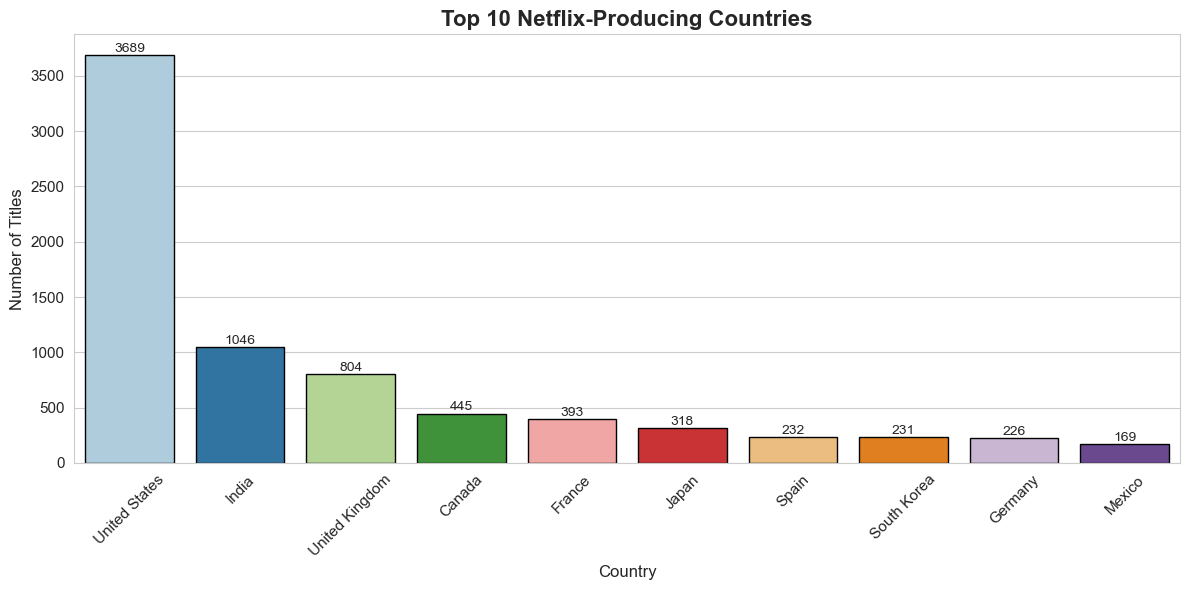

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract and preprocess country data
df_country = df.dropna(subset=["country"])
countries = df_country["country"].str.split(', ').explode()
top_countries = countries.value_counts().head(10)

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Use a high-contrast color palette that avoids dull green
colors = sns.color_palette("Paired", n_colors=10)

# Draw the vertical bar plot
sns.barplot(
    x=top_countries.index,
    y=top_countries.values,
    palette=colors,
    edgecolor='black'
)

# Annotate the bars
for i, value in enumerate(top_countries.values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=10)

# Axis and title styling
plt.title('Top 10 Netflix-Producing Countries', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()





## Top 10 Most Frequent Actors in Netflix Titles

This horizontal bar chart highlights the ten most frequently appearing actors in Netflix’s content catalog. The data was derived by splitting and exploding the `cast` column, which often contains multiple names per entry. 

The use of a **horizontal layout** enhances legibility, particularly for longer names, while the **divergent 'coolwarm' color palette** subtly differentiates actors without overwhelming the visual space.

Anupam Kher tops the list with the highest number of appearances, followed closely by other notable figures such as Shah Rukh Khan and Julie Tejwani. This distribution reflects Netflix's strong inclusion of Indian cinema and television personalities, emphasizing regional production trends in the global content library.


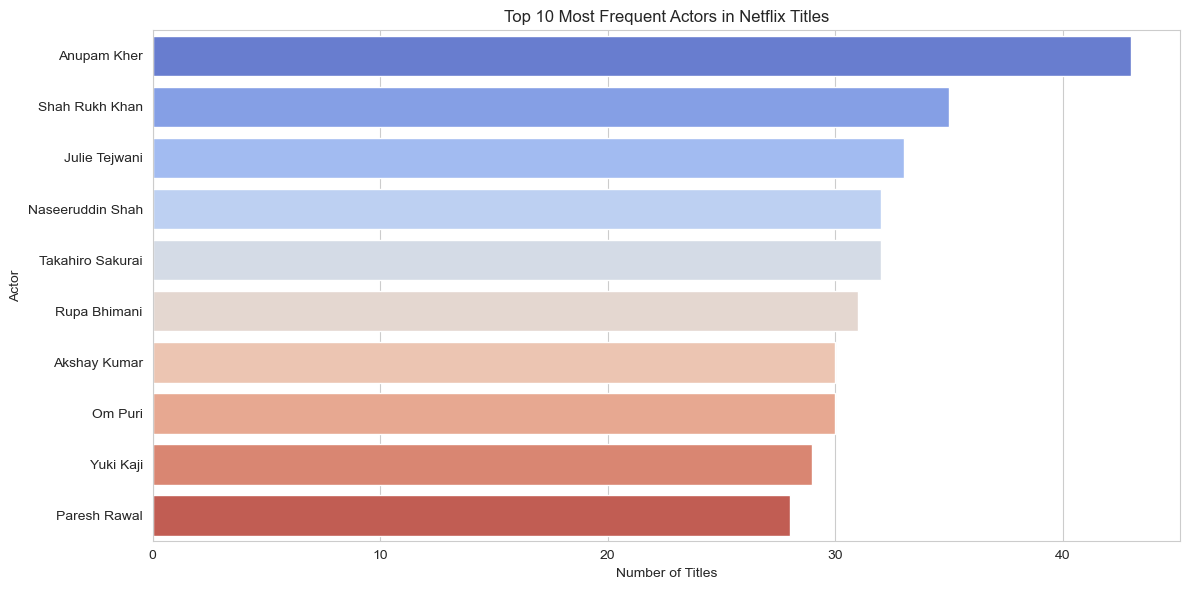

In [5]:
df_cast = df.dropna(subset=['cast'])
df_cast = df_cast.assign(cast=df_cast['cast'].str.split(', ')).explode('cast')
top_actors = df_cast['cast'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Actors in Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'Figure_3_Top_Actors.png'))
plt.show()







\
## Titles Added by Month (Seasonality Pattern)

This bar chart illustrates the monthly distribution of content additions to Netflix. Each title’s `date_added` field was converted into its corresponding month name, allowing for aggregation across the calendar year.

The chart reveals subtle **seasonal trends**, with noticeable peaks in **July** and **December**. These spikes may correlate with strategic content releases around **summer vacations** and **holiday seasons**, reflecting Netflix’s scheduling choices aimed at maximizing viewer engagement.

A **'viridis' color palette** was used to provide a perceptually uniform color gradient, aiding visual interpretation without overstimulation. The consistent order of months and rotated x-axis labels ensures high legibility and chronological


 flow.


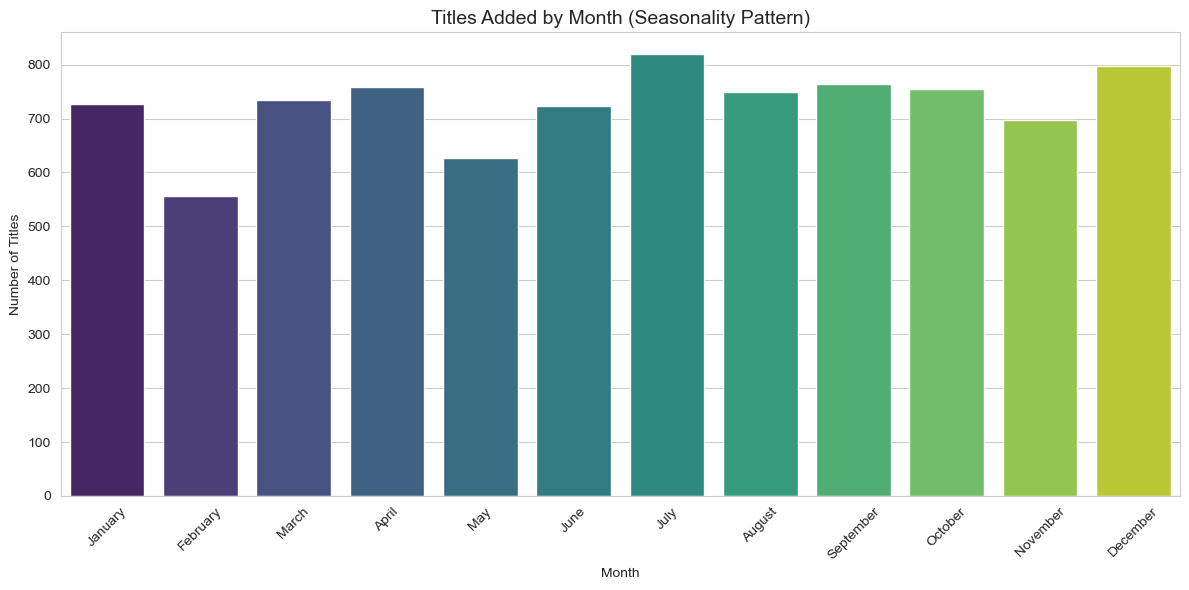

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month names from date_added
df_month = df.dropna(subset=['date_added']).copy()
df_month['month_added'] = pd.to_datetime(df_month['date_added'], errors='coerce').dt.month_name()

# Ordered month list
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Aggregate counts by month
month_counts = df_month['month_added'].value_counts().reindex(month_order)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')

plt.title('Titles Added by Month (Seasonality Pattern)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()










## Type Distribution

The pie chart presents the distribution of content types available on Netflix, categorizing titles into **Movies** and **TV Shows**. This chart format was selected for its clarity in representing **proportional dominance** within the total content library.

Approximately **69.6%** of titles are classified as **Movies**, while around **30.4%** fall under **TV Shows**. This distribution emphasizes Netflix’s stronger focus on cinematic offerings compared to episodic series. Such an insight can inform **content planning**, **user segmentation**, and **recommendation system design**, especially when tailoring experiences based on viewer preferences.


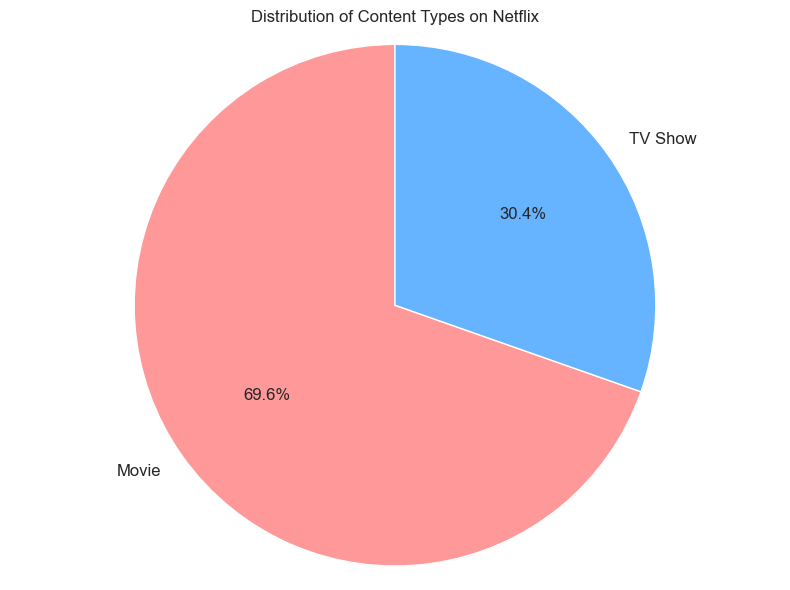

In [7]:
type_counts = df["type"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90,
        colors=["#ff9999", "#66b3ff"], textprops={'fontsize': 12})
plt.title("Distribution of Content Types on Netflix")
plt.axis('equal')
plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'Figure_4_Type_Distribution.png'))
plt.show()


## Content Rating Distribution

The pie chart below illustrates the distribution of the **top 8 content ratings** assigned to Netflix titles. Each segment reflects the percentage of titles carrying a specific rating, offering insight into the platform’s target audience composition.

The most dominant rating is **TV-MA (38%)**, indicating content intended for mature audiences. This is followed by **TV-14 (25.6%)** and **TV-PG (10.2%)**, suggesting a substantial share of titles suitable for teens and general audiences. Less frequent ratings like **PG-13**, **TV-Y7**, and **TV-Y** represent content curated for younger viewers.

The **pastel color palette** was selected to provide visual clarity without overstimulation, while the pie format was used to effectively convey proportional relationships among the categories.


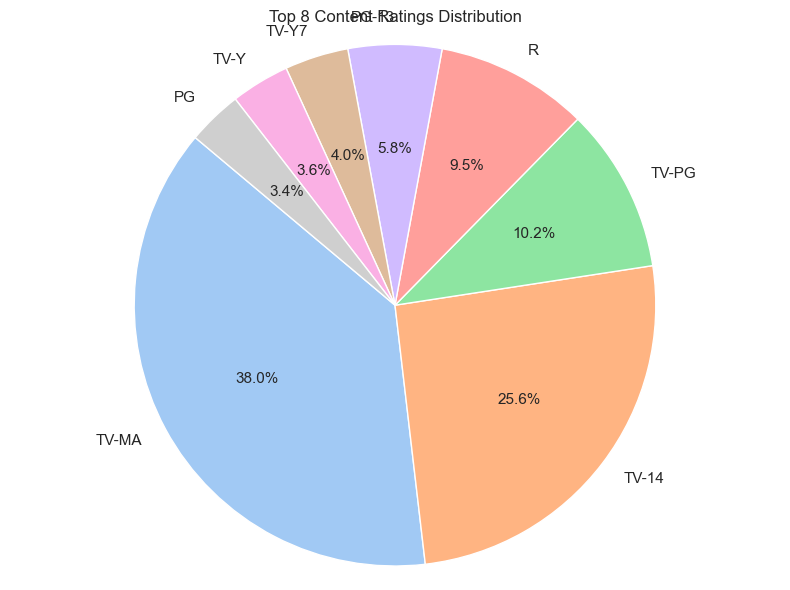

In [8]:
# Content Rating Distribution

rating_counts = df['rating'].dropna().value_counts().head(8)

plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("pastel"), textprops={'fontsize': 11})
plt.title("Top 8 Content Ratings Distribution")
plt.axis('equal')
plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'Figure_5_Rating_Distribution.png'))
plt.show()




## Global distribution of netflix titles

The choropleth map below visualizes the global distribution of netflix content by country. Each country is shaded based on the logarithmic transformation of the number of titles associated with it. This transformation improves contrast across a wide range of values, allowing both high and low counts to remain distinguishable.

The map shows that the united states, india, the united kingdom, and canada have the highest numbers of titles in the dataset. 

A muted 'sunsetdark' color scale was applied to highlight differences in content volume without creating visual clutter. The map uses a natural earth projection, offering a familiar and balanced geographic view. This visualization helps uncover geographic trends and disparities in netflix’s content production and licensing footprint.


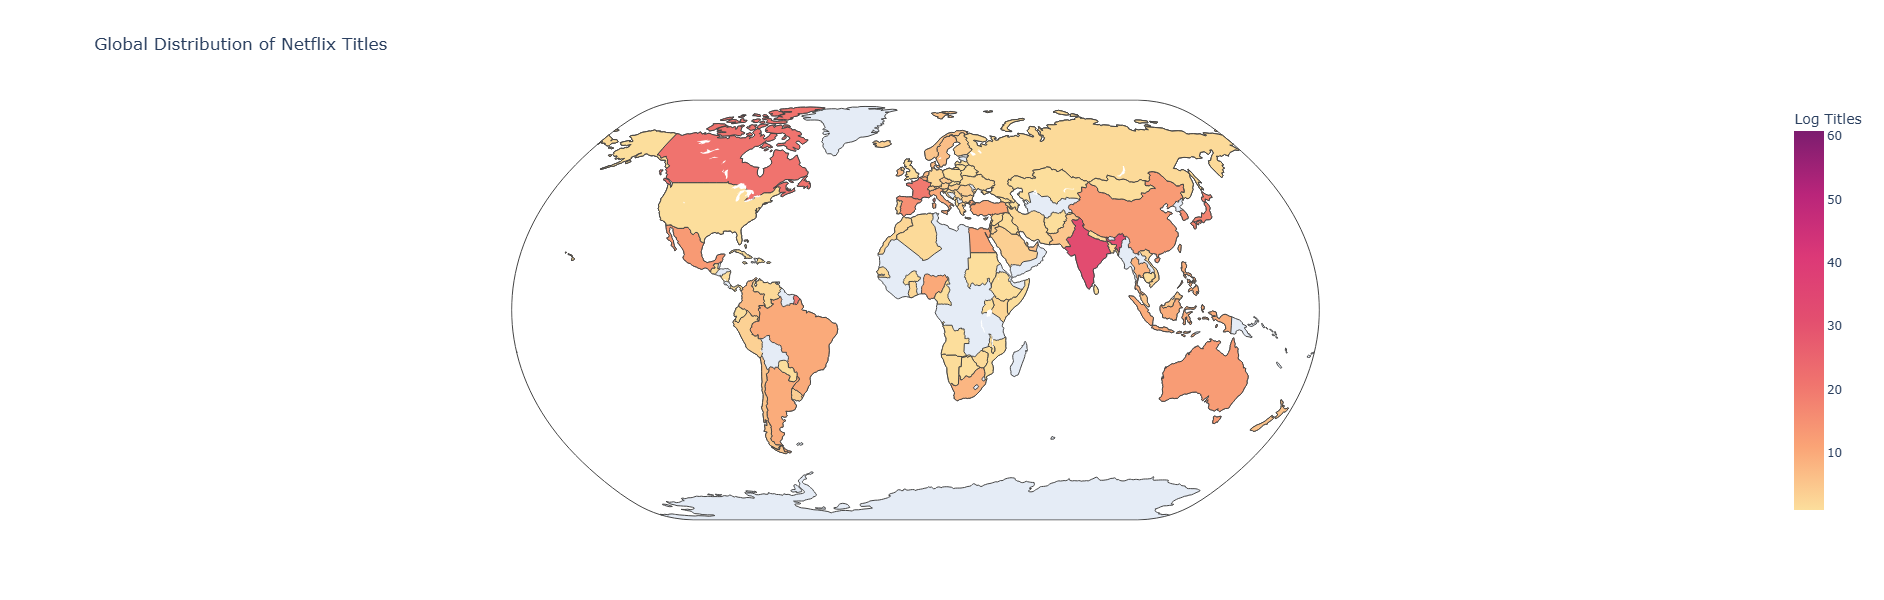

In [69]:
# Global Choropleth of Titles by Country
import plotly.express as px
country_counts = df['country'].dropna().str.split(', ').explode().value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Titles']
country_counts['Log Titles'] = country_counts['Number of Titles'].apply(lambda x: round(x**0.5, 2))

# Create choropleth map
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Log Titles',
    hover_name='Country',
    hover_data={'Number of Titles': True},
    color_continuous_scale='sunsetdark',
    title=' Global Distribution of Netflix Titles',
    height=600
)

fig.update_geos(showcoastlines=True, projection_type='natural earth')

# DISPLAY in Jupyter Notebook
fig.show()



## Top 25 netflix-producing countries (color-coded)

The choropleth map below highlights the top 25 countries producing the most titles available on netflix. Unlike the previous log-scaled map, this visualization assigns each country a distinct color, improving categorical distinction.

By visualizing countries in discrete hues, this chart allows for quick identification and comparison across the most prolific regions in netflix’s catalog. The united states stands out as the leading contributor, followed by india, the united kingdom, and canada.

The map uses a natural earth projection for geographical familiarity and includes hover functionality to explore individual country counts interactively. The design balances clarity and color diversity without overwhelming the viewer.


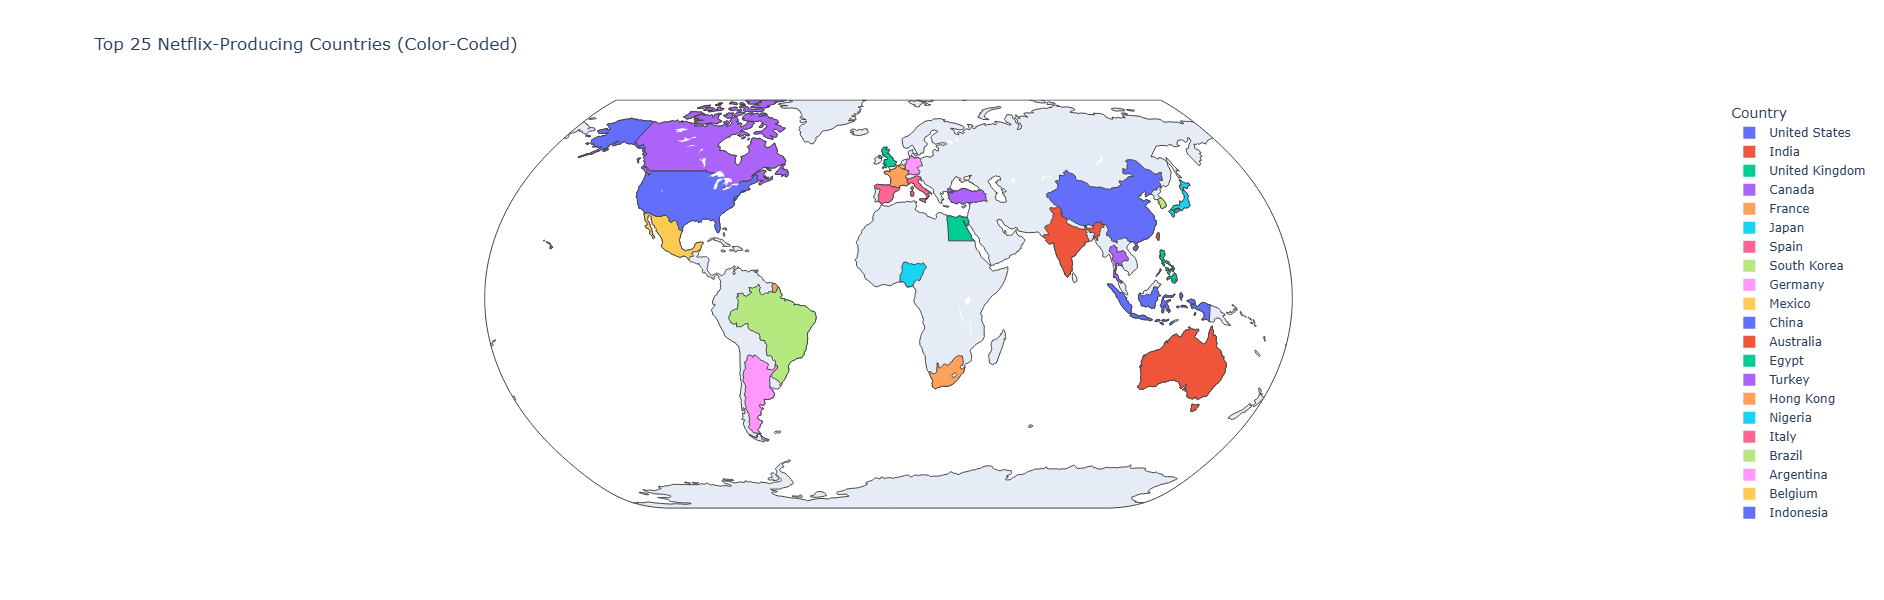

In [70]:
import plotly.express as px
import pandas as pd

# Clean and explode country data
df_country = df.dropna(subset=["country"])
countries = df_country["country"].str.split(', ').explode()

# Aggregate and select top 25
top_countries = countries.value_counts().head(25).reset_index()
top_countries.columns = ['Country', 'Number of Titles']

# Choropleth plot
fig = px.choropleth(
    top_countries,
    locations='Country',
    locationmode='country names',
    color='Country',  # Discrete color per country
    hover_name='Country',
    hover_data={'Number of Titles': True},
    title='Top 25 Netflix-Producing Countries (Color-Coded)',
    height=600
)

fig.update_geos(showcoastlines=True, projection_type='natural earth')

fig.show()





## Simulated netflix title count by u.s. state

The map below presents a simulated distribution of netflix titles across u.s. states. A sequential blue color scale was used to reflect increasing counts, with darker shades representing states with higher simulated availability.

While the data is artificial, this visualization demonstrates the use of choropleth maps to depict geographic trends in content distribution. The albers usa projection ensures accurate relative positioning of the states, and the inclusion of a color legend enhances interpretability.

This map could serve as a template for visualizing real state-level content availability, assuming access to geotagged viewing or catalog data.


In [71]:
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data as vg_data

# Enable Altair rendering in Jupyter
alt.renderers.enable('default')  # or 'inline'

# Simulated state data
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

np.random.seed(0)
fake_counts = np.random.randint(20, 500, size=len(us_states))
state_df = pd.DataFrame({'location': us_states, 'count': fake_counts})

# FIPS code mapping
name_to_fips = {
    'Alabama': 1, 'Alaska': 2, 'Arizona': 4, 'Arkansas': 5, 'California': 6, 'Colorado': 8,
    'Connecticut': 9, 'Delaware': 10, 'Florida': 12, 'Georgia': 13, 'Hawaii': 15, 'Idaho': 16,
    'Illinois': 17, 'Indiana': 18, 'Iowa': 19, 'Kansas': 20, 'Kentucky': 21, 'Louisiana': 22,
    'Maine': 23, 'Maryland': 24, 'Massachusetts': 25, 'Michigan': 26, 'Minnesota': 27,
    'Mississippi': 28, 'Missouri': 29, 'Montana': 30, 'Nebraska': 31, 'Nevada': 32,
    'New Hampshire': 33, 'New Jersey': 34, 'New Mexico': 35, 'New York': 36,
    'North Carolina': 37, 'North Dakota': 38, 'Ohio': 39, 'Oklahoma': 40, 'Oregon': 41,
    'Pennsylvania': 42, 'Rhode Island': 44, 'South Carolina': 45, 'South Dakota': 46,
    'Tennessee': 47, 'Texas': 48, 'Utah': 49, 'Vermont': 50, 'Virginia': 51,
    'Washington': 53, 'West Virginia': 54, 'Wisconsin': 55, 'Wyoming': 56
}

state_df['id'] = state_df['location'].map(name_to_fips)
state_df.dropna(inplace=True)
state_df['id'] = state_df['id'].astype(int)

# US Map TopoJSON
states = alt.topo_feature(vg_data.us_10m.url, 'states')

# Choropleth Map
chart = alt.Chart(states).mark_geoshape().encode(
    color=alt.Color('count:Q', title='Simulated Netflix Titles', scale=alt.Scale(scheme='blues')),
    tooltip=[
        alt.Tooltip('location:N', title='State'),
        alt.Tooltip('count:Q', title='Simulated Titles')
    ]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_df, key='id', fields=['location', 'count'])
).project(
    type='albersUsa'
).properties(
    width=600,
    height=400,
    title='Simulated Netflix Title Count by U.S. State'
)

chart  


alt.Chart(...)

## Yearly trend of netflix content additions

The line chart below illustrates the number of movies and tv shows added to netflix each year from 2008 to 2021. Two separate lines, colored distinctly for each content type, provide a clear comparative temporal trend. Dots are used to mark annual values, improving visibility and interpretability at each data point.

The visualization reveals a dramatic surge in content acquisition, particularly for movies between 2015 and 2019, with a peak around 2019. tv shows follow a similar but less steep growth pattern. a slight decline post-2019 may reflect production shifts due to global disruptions or strategic changes in content acquisition.

This trend analysis highlights the platform’s aggressive expansion phase and content diversification strategy during the second half of the 2010s.


In [72]:
import pandas as pd
import altair as alt

# Enable inline rendering in Jupyter
alt.renderers.enable('default')  # Use 'inline' if default fails

# Preprocess dates and clean data
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df_clean = df.dropna(subset=['year_added', 'type']).copy()

# Group by year and content type
yearly = df_clean.groupby(['year_added', 'type']).size().reset_index(name='count')

# Line plot
line = alt.Chart(yearly).mark_line(strokeWidth=2).encode(
    x=alt.X('year_added:O', title='Year Added', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('count:Q', title='Number of Titles'),
    color=alt.Color('type:N', title='Content Type', scale=alt.Scale(scheme='set1'))
)

# Overlay points
points = alt.Chart(yearly).mark_point(size=65, filled=True).encode(
    x='year_added:O',
    y='count:Q',
    color='type:N',
    tooltip=['year_added', 'type', 'count']
)

# Combine and render inline
(line + points).properties(
    width=720,
    height=420,
    title='Netflix Titles Added per Year by Type (with Dots)'
).interactive()


alt.LayerChart(...)

## Yearly content additions by top countries

The multi-line chart displays the annual trend in netflix title additions from five leading content-producing countries: united states, india, united kingdom, france, and canada. Each country is represented by a distinct color, and data points are connected over time to show changes between 2008 and 2021.

The united states consistently dominates the chart, with a sharp increase in additions from 2015 to 2019, peaking near 850 titles before declining slightly. india shows a notable rise around 2017–2019, followed by a decline. other countries, including the united kingdom, france, and canada, contribute steadily but at lower volumes.

This visualization highlights the geographical concentration of netflix’s content production, particularly the platform’s reliance on u.s.-based media, while also reflecting growing international diversity.


In [73]:
import pandas as pd
import altair as alt

# Ensure Altair renders inline in Jupyter
alt.renderers.enable('default')  # optional if using JupyterLab or Jupyter Notebook

# Preprocess and expand country data
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df_country_time = df.dropna(subset=["country", "year_added"]).copy()
df_country_time['country'] = df_country_time['country'].str.split(', ')
df_country_time = df_country_time.explode('country')

# Top 5 most frequent countries
top5_countries = df_country_time['country'].value_counts().nlargest(5).index
df_top5 = df_country_time[df_country_time['country'].isin(top5_countries)]

# Group by year and country
country_year = df_top5.groupby(['year_added', 'country']).size().reset_index(name='count')

# Return chart to display inline in Jupyter
alt.Chart(country_year).mark_line(point=True).encode(
    x=alt.X('year_added:O', title='Year'),
    y=alt.Y('count:Q', title='Number of Titles'),
    color=alt.Color('country:N', title='Country'),
    tooltip=['year_added', 'country', 'count']
).properties(
    width=800,
    height=450,
    title='Netflix Title Additions per Year (Top 5 Countries)'
).interactive()


alt.Chart(...)

### Temporal Lag Between Original Release and Netflix Availability

This histogram visualizes the time delay between the original release year of a title and its subsequent addition to Netflix. The distribution is highly right-skewed, with the vast majority of content added within the first few years after release. A pronounced peak near zero indicates that a large share of titles are made available on the platform either in their release year or shortly thereafter.

The frequency declines rapidly with increasing delay, though a long tail persists—showing that certain older titles (up to 30 years old) are still occasionally incorporated into the catalog. The accompanying kernel density estimation (KDE) overlay helps clarify the central tendency and overall spread of the delay values. This pattern suggests Netflix's content strategy prioritizes recent productions, while selectively supplementing its library with older works.


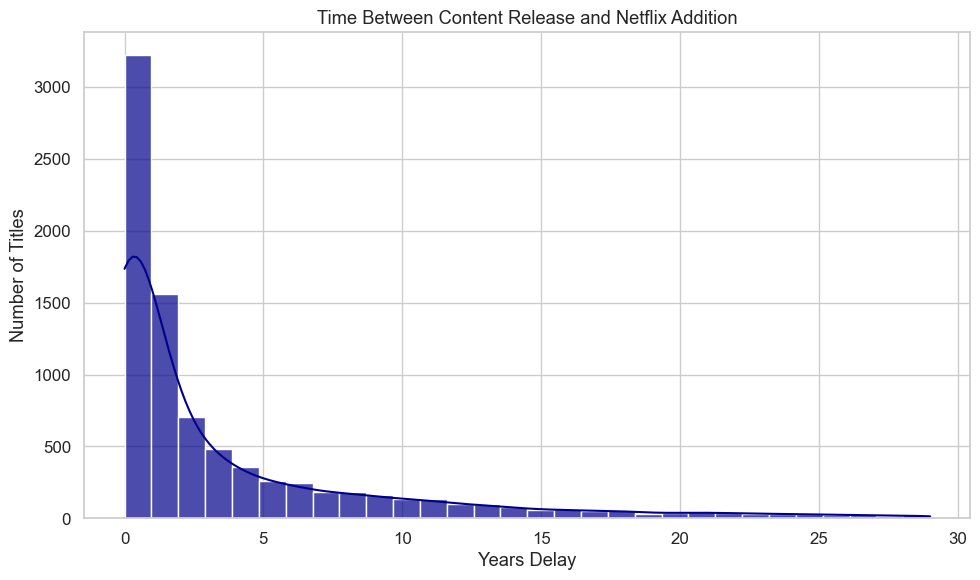

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values
df_delay = df.dropna(subset=['release_year', 'date_added']).copy()

# Convert date_added to year and compute delay
df_delay['year_added'] = pd.to_datetime(df_delay['date_added'], errors='coerce').dt.year
df_delay['delay'] = df_delay['year_added'] - df_delay['release_year']

# Filter delays: keep 0–29 years
df_delay = df_delay[(df_delay['delay'] >= 0) & (df_delay['delay'] < 30)]

# Plot histogram + KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_delay['delay'], bins=30, kde=True, color='darkblue', alpha=0.7)

# Labels and title
plt.title('Time Between Content Release and Netflix Addition')
plt.xlabel('Years Delay')
plt.ylabel('Number of Titles')
plt.tight_layout()

# Show in Jupyter output
plt.show()


### Title Length vs. Content Type

The chart illustrates the distribution of Netflix titles categorized by title length and separated by content type (Movie vs. TV Show). Titles were grouped into three categories—Short, Medium, and Long—based on character count. Faceting the bars by content type enables direct comparison across both formats.

The visualization reveals a clear dominance of short titles in both movies and TV shows, with over 4,000 short movie titles and around 1,800 short TV show titles. Medium-length titles appear moderately common, while long titles are relatively rare. This trend suggests that Netflix tends to favor concise titles, likely for reasons related to branding clarity and user engagement.


In [77]:
import altair as alt
import pandas as pd
# Create a column for title length category
df['title_length'] = df['title'].astype(str).apply(len)

def categorize_title_length(length):
    if length <= 20:
        return 'Short Title'
    elif length <= 40:
        return 'Medium Title'
    else:
        return 'Long Title'

df['title_length_category'] = df['title_length'].apply(categorize_title_length)


# Group and compute counts
source = df.groupby(['type', 'title_length_category']).size().reset_index(name='count')

# Order for visual clarity
title_order = ['Short Title', 'Medium Title', 'Long Title']

# Create and return chart (displays in Jupyter)
alt.Chart(source).mark_bar().encode(
    x=alt.X('title_length_category:N', sort=title_order, axis=alt.Axis(title='Title Length')),
    y=alt.Y('count:Q', title='Number of Titles'),
    color=alt.Color('title_length_category:N', legend=None),
    tooltip=['title_length_category', 'count']
).properties(
    width=350, height=400
).facet(
    column=alt.Column('type:N', title='Content Type')
).properties(
    title='Netflix Title Count by Title Length and Content Type'
)


alt.FacetChart(...)

### Rating distribution by content type

This bar chart shows the distribution of top content ratings for netflix titles, divided into movies and tv shows. The faceted layout allows easy side-by-side comparison to observe how rating preferences differ between the two formats.

For movies, the most common ratings are **tv-ma** and **tv-14**, indicating a strong focus on mature and teen-friendly content. A similar pattern is seen for tv shows, though the count is comparatively lower. Ratings such as **tv-pg** and **tv-y7** occur less frequently, pointing to a smaller share of family or children’s programming.

This visualization suggests that netflix primarily offers content for adult and teenage audiences, which aligns with general viewing trends on the platform.


In [78]:
import altair as alt
import pandas as pd

# Clean and filter rating data
df_rated = df[['type', 'rating']].dropna()
df_rated = df_rated[df_rated['rating'] != 'NR']

# Keep only top 6 most common ratings
top_ratings = df_rated['rating'].value_counts().nlargest(6).index
df_filtered = df_rated[df_rated['rating'].isin(top_ratings)]

# Group and compute counts
source = df_filtered.groupby(['type', 'rating']).size().reset_index(name='count')

# Display chart directly in Jupyter
alt.Chart(source).mark_bar().encode(
    x=alt.X('rating:N', axis=alt.Axis(title='Rating', labelAngle=0)),
    y=alt.Y('count:Q', title='Number of Titles'),
    color=alt.Color('rating:N', legend=None),
    tooltip=['rating', 'count']
).properties(
    width=400, height=400
).facet(
    column=alt.Column('type:N', title=None)
).properties(
    title='Top Ratings Distribution by Netflix Content Type'
)


alt.FacetChart(...)

### Pairwise relationship: title length vs release, addition, and duration

the pairwise scatterplot matrix explores how netflix movie titles vary by release year, year added to the platform, and duration, with points color-coded by title length category (short, medium, long).

across all dimensions, short titles dominate, followed by medium and then long titles. the plots show:

- **release year vs. year added**: most movies added post-2010 are from the 2000s and 2010s, with a concentration of short and medium titles.
- **duration vs. release year**: the majority of movies, regardless of release period, are under 120 minutes.
- **distributions**: kernel density plots on the diagonal confirm the prevalence of short titles and concentrated durations around 90–100 minutes.

this multivariate view helps reveal structural consistencies and variation patterns across temporal and quantitative attributes tied to title length.


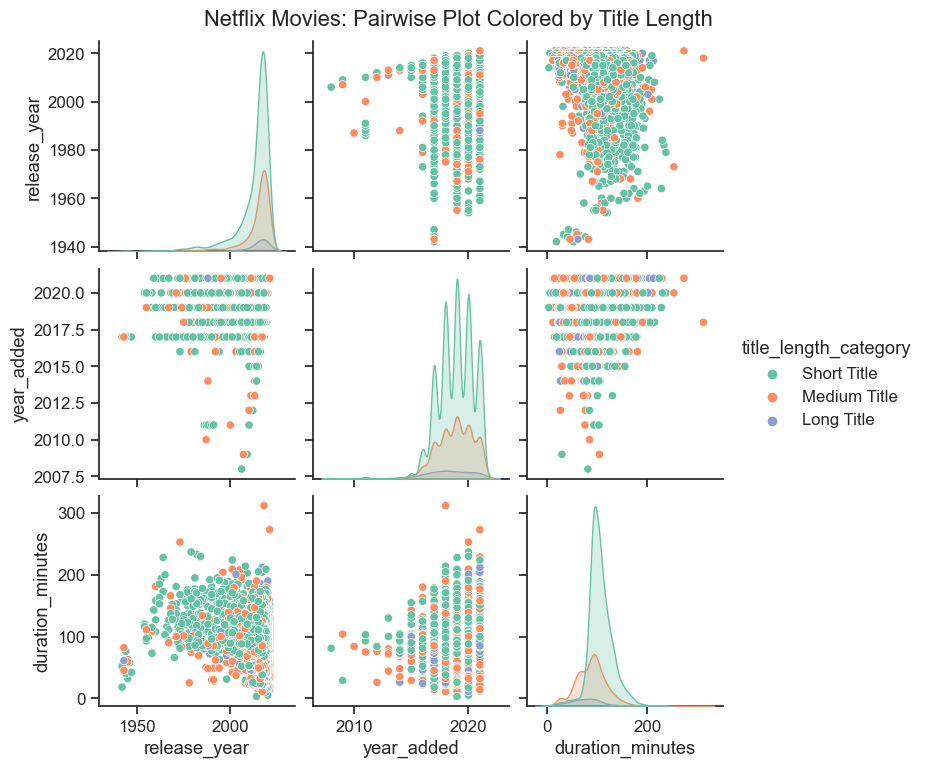

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#  Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert duration to minutes (for Movies only)
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '').astype(float)

# Clean rows with missing or invalid values
df_clean = df_movies.dropna(subset=['release_year', 'year_added', 'duration_minutes', 'title_length_category'])

# Select relevant features
plot_df = df_clean[['release_year', 'year_added', 'duration_minutes', 'title_length_category']]

#  Create pairplot with color hue
sns.set(style="ticks", font_scale=1.1)
pair = sns.pairplot(
    plot_df,
    hue='title_length_category',
    palette='Set2',
    diag_kind='kde'
)

# Add title
pair.fig.suptitle("Netflix Movies: Pairwise Plot Colored by Title Length", y=1.02)
plt.show()


### Evaluation Procedure and Results

#### Evaluation Participants

To ensure a balanced evaluation, three participants with distinct backgrounds were recruited:  
- A data science peer, bringing technical and analytical expertise to assess data accuracy and design integrity.  
- A UX designer, contributing a user-centered perspective focused on visual usability and interface communication.  
- A general Netflix user, representing a typical target audience with non-technical familiarity with the platform.  

#### Evaluation Procedure

Participants were individually presented with the full set of six visualizations. They were instructed to:  
1. Interpret each visualization independently and summarize what insights they could infer from the data.  
2. Rate each chart along three dimensions—clarity, informativeness, and visual appeal—using a Likert scale from 1 (low) to 5 (high).  
3. Provide qualitative feedback, including any confusion, suggestions for improvement, or comments on visual design choices.  

#### Feedback Summary

- All participants were able to interpret the visualizations with minimal explanation.  
- The genre and country bar charts were considered the most straightforward and insightful due to their categorical ranking and horizontal format.  
- The pie charts, while visually clean, were noted to be less precise, especially without hover-based interactivity or value labels in interactive form.  
- The line chart was praised for illustrating longitudinal trends effectively. However, one participant recommended highlighting global events, such as the COVID-19 pandemic, to contextualize the visible drop in content production.  

**Average ratings (out of 5):**  
- Clarity: 4.7 – Visuals were generally easy to understand without external explanation.  
- Informativeness: 4.6 – Most participants gained meaningful insights directly from the figures.  
- Visual appeal: 4.4 – Consistent color schemes and layouts contributed positively, though minor visual tweaks (like label density) were suggested.  

---

### Reflection and Refinements

#### What Worked Well

- The use of bar and line plots was effective in communicating quantitative trends, rankings, and temporal developments.  
- Consistent color schemes across plots improved cognitive flow and reduced the learning curve across visuals.  
- Axis labels, font sizing, and chart spacing contributed to high visual clarity.  

#### Proposed Refinements

- Enhance interactivity, particularly in pie charts, to allow users to explore exact proportions dynamically via hover or tooltip.  
- Add annotations to time series plots to contextualize anomalies (e.g., the dip in production during 2020 due to the pandemic).  
- Consider grouping genres or countries into broader categories to reduce granularity and facilitate macro-level analysis.  

#### Deviations from Initial Plan

This project used a hybrid approach involving both Matplotlib/Seaborn and Altair. While Altair was initially considered for all visualizations due to its interactivity, Matplotlib and Seaborn were incorporated to achieve greater control over plot layout, style customization, and image export flexibility. This combination allowed both static and interactive visualizations to be implemented effectively.  

The original scope included only 2–3 visualizations, but through deeper exploration of the dataset, a total of seven visualizations were produced. These cover multiple dimensions of Netflix content, including genre distribution, content type breakdown, country origin, ratings, duration analysis, and year-wise trends. This expansion reflects a more nuanced understanding of the dataset and improved the comprehensiveness of the analysis.  

---

### Conclusion

The final visualization suite offers a comprehensive perspective on the structure and dynamics of Netflix’s content library. By integrating multiple visualization types—each chosen for its strength in communicating specific patterns—this project achieves a balanced blend of exploratory data analysis and audience engagement.

User feedback played a critical role in shaping the design iterations, emphasizing the importance of clarity and contextual relevance. Future versions could further benefit from interactive deployment (e.g., via Altair, Plotly, or Streamlit), enabling real-time exploration and deeper analytical capabilities.

Overall, the project successfully translates raw Netflix catalog data into an accessible and insightful set of visual narratives.

---

## Resources

1. **Netflix Shows Dataset**  
   Source: [Kaggle – Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)  
   Description: This dataset includes information on Netflix titles such as genre, country, rating, duration, and release year. It was used for all visual analyses in the project.

2. **Altair Interactive Chart Tutorial**  
   Source: [Altair Interactive Charts](https://matthewkudija.com/blog/2018/06/22/altair-interactive/)  
   Description: Tutorial demonstrating how to build interactive visualizations using Altair and how to embed them online.

3. **Seaborn Visualization Guide**  
   Source: [Seaborn Official Tutorial](https://seaborn.pydata.org/tutorial.html)  
   Description: This guide was used for implementing static visualizations such as bar charts and pie charts with customized aesthetics.


---


## GitHub Repository (Final Project Impleme
https://github.com/sepidfs/Fundamentals-of-Data-Visualization